We recieved data files of telecom operator Megaline, that offers its clients two prepaid plans, Surf and Ultimate. Our main task is to determine which of the plans brings in more revenue in order to adjust the advertising budget.

We will end the task by checking two hypotheses proposed by the admin. 

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy import stats 
import matplotlib_inline.backend_inline
import math

pd.options.mode.chained_assignment = None  

### These lines will make the graphs much crisper

#if isinstance('svg', str):
#   ipython_format = ['svg']
#   matplotlib_inline.backend_inline.set_matplotlib_formats(*ipython_format)

First' let's load the data:

In [2]:
# Load the data files into raw_data df.

try:
  raw_calls = pd.read_csv("/content/sample_data/megaline_calls.csv", )
except: 
  raw_calls = pd.read_csv("/datasets/megaline_calls.csv", )

try:
  raw_internet = pd.read_csv("/content/sample_data/megaline_internet.csv", )
except: 
  raw_internet = pd.read_csv("/datasets/megaline_internet.csv", )

try:
  raw_messages = pd.read_csv("/content/sample_data/megaline_messages.csv", )
except: 
  raw_messages = pd.read_csv("/datasets/megaline_messages.csv", )

try:
  raw_plans = pd.read_csv("/content/sample_data/megaline_plans.csv", )
except: 
  raw_plans = pd.read_csv("/datasets/megaline_plans.csv", )

try:
  raw_users = pd.read_csv("/content/sample_data/megaline_users.csv", )
except: 
  raw_users = pd.read_csv("/datasets/megaline_users.csv", )

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great job using **try-except** construction!
Really helpful when you want your script to work both locally and on the platform.
</div>

In order to understand what is going on in our data we should check each file separately, as looping through won't help us here... 

In [3]:
print("*********************************************")
print("******************🅳🅰🆃🅰*******************")
print("*********************************************")
print(" ")
print(raw_calls.head(5))
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾*******************")
print("*********************************************")
print(" ")
raw_calls.info()
print(" ")
print("*********************************************")
print("****🅳🆄🆁🅰🆃🅸🅾🅽  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂****")
print("*********************************************")
print(" ")
raw_calls.duration.describe()

*********************************************
******************🅳🅰🆃🅰*******************
*********************************************
 
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
 
*********************************************
******************🅸🅽🅵🅾*******************
*********************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
 
*********************************************
****🅳🆄🆁🅰🆃🅸🅾🅽  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂****
*********************************************
 


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

raw_calls file contains a 4/137735  table. No nans. The tables ***duration*** and ***user_id*** look ok, but  ***call_date:*** must change the type to dateframe. 
At this point I choose not to change the type of the ***id*** column to numeric. For now I will leave it as string. 

From the project description we know that the call duration should be rounded up to the closest minute. 
So let's change the ***date_call*** type and round the seconds up to the closest minute. 

In [4]:
# Changing the call date type to datetime

raw_calls.call_date = pd.to_datetime(raw_calls.call_date, format='%Y-%m-%d')

# Rounding the durutions up

raw_calls.duration = raw_calls.duration.apply(np.ceil)

# Check:
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾*******************")
print("*********************************************")
print(" ")
raw_calls.info()
print(" ")
print("*********************************************")
print("****🅳🆄🆁🅰🆃🅸🅾🅽  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂****")
print("*********************************************")
print(" ")
print(raw_calls.duration.head(5))

 
*********************************************
******************🅸🅽🅵🅾*******************
*********************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
 
*********************************************
****🅳🆄🆁🅰🆃🅸🅾🅽  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂****
*********************************************
 
0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
Name: duration, dtype: float64


Great, 8.52 changed to 9 and numerics to datetime.

Our next table is ***raw_internet***. Let's see what is going on there:

In [5]:


print("*********************************************")
print("******************🅳🅰🆃🅰*******************")
print("*********************************************")
print(" ")
print(raw_internet.head(5))
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾*******************")
print("*********************************************")
print(" ")
raw_internet.info()
print(" ")
print("*********************************************")
print("*****🅼🅱_🆄🆂🅴🅳  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂*****")
print("*********************************************")
print(" ")
raw_internet.mb_used.describe()

*********************************************
******************🅳🅰🆃🅰*******************
*********************************************
 
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
 
*********************************************
******************🅸🅽🅵🅾*******************
*********************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
 
*********************************************
*****🅼🅱_🆄🆂🅴🅳  🅲🅾🅻🆄🅼🅽  🆂🆃🅰🆃🆂*****
*********************************************
 


count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

We notice that there are 2 columns that appear again: ***id*** and ***user id***. Meaning we **potentially** can merge the first and the second csv files (raw_internet and raw_calls). 

So far there are no Nans, but the ***session_date*** column got the wrong type again. Let's change it:

In [6]:
raw_internet.session_date   = pd.to_datetime(raw_internet.session_date, format='%Y-%m-%d')

# Check:

raw_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


We are moving to the next table: ***raw_messages***

In [7]:


print("*********************************************")
print("******************🅳🅰🆃🅰*******************")
print("*********************************************")
print(" ")
print(raw_messages.head(5))
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾*******************")
print("*********************************************")
print(" ")
raw_messages.info()



*********************************************
******************🅳🅰🆃🅰*******************
*********************************************
 
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
 
*********************************************
******************🅸🅽🅵🅾*******************
*********************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No Nans. Let's change the ***message_date*** column:

In [8]:
raw_messages.message_date   = pd.to_datetime(raw_messages.message_date, format='%Y-%m-%d')

# Check:
raw_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Moving to ***raw_plans*** column:

In [9]:
print("*********************************************")
print("******************🅳🅰🆃🅰*******************")
print("*********************************************")
print(" ")
print(raw_plans.head(5))
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾********************")
print("*********************************************")
print(" ")
raw_plans.info()

*********************************************
******************🅳🅰🆃🅰*******************
*********************************************
 
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
 
*********************************************
******************🅸🅽🅵🅾********************
*********************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-nu

At this stage it is not clear if any of the columns in this table should change their type. Therefore, for now, we will leave them as is.       

Moving to the  ***raw_users*** file: 

In [10]:

print("*********************************************")
print("******************🅳🅰🆃🅰*******************")
print("*********************************************")
print(" ")
print(raw_users.head(5))
print(" ")
print("*********************************************")
print("******************🅸🅽🅵🅾*******************")
print("*********************************************")
print(" ")
raw_users.info()
print(" ")
print("*********************************************")
print("****************🆂🆃🅰🆃🆂*********************")
print("*********************************************")
print(" ")
raw_users.plan.value_counts()

*********************************************
******************🅳🅰🆃🅰*******************
*********************************************
 
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
 
*********************************************
******************🅸🅽🅵🅾*******************
*********************************************
 
<class 'pandas.core.fra

surf        339
ultimate    161
Name: plan, dtype: int64

Churn date column contains only 34 instances, meaning the other 466 were active users on the day the data was collected. 

We have two dates columns in this table: ***reg_date*** and ***churn_date***. Both in the wrong format. Let's change it:


In [11]:
raw_users.reg_date = pd.to_datetime(raw_users.reg_date, format='%Y-%m-%d')
raw_users.churn_date = pd.to_datetime(raw_users.churn_date, format='%Y-%m-%d')

# Check:
raw_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


From the task description we know that later on we will need to compare the NY-NJ users with the rest of the customers, so lets make a step that will assist us later on: Let's split split the data stored in the ***city*** column, and save the states in a column ***PostCode*** 




In [12]:

raw_users['Address'], raw_users['PostCode'] = raw_users['city'].str.rsplit(', ', 1).str

# let's check if  we can pull out New Yorkers! They are stored as "NY-NJ-PA MSA".

# Using str.contains we will pull out only the NY-NJ

NY_NJ_test = raw_users[raw_users['city'].str.contains("NY|NJ")]
NY_NJ_PA_MSA_test = raw_users[raw_users['city'].str.contains("NY-NJ-PA MSA")]

# How many NY-NJ instances we have?
          
if len(NY_NJ_test) ==  len(NY_NJ_PA_MSA_test):
    print("Yes,  NY-NJ-PA MSA are the only value corresponding to NY-NJ area")
else:
    print("There are", len(NY_NJ_test), "instances of either NY, NJ, or NY_NJ, and only", len(NY_NJ_PA_MSA_test), "instances of NY-NJ-PA MSA" )


There are 103 instances of either NY, NJ, or NY_NJ, and only 80 instances of NY-NJ-PA MSA


Our next goal, is to calculate:

1. The number of calls made and minutes used per month
2. The number of text messages sent per month
3. The volume of data per month
4. The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

Let's tackle these tasks one by one:

## 1. The number of calls made *(count)* and minutes used *(sum)* per month per user.



In [13]:
new_calls = raw_calls.groupby(['user_id', raw_calls.call_date.dt.month]).agg({'duration' : ('count','sum')}).reset_index()
new_calls.rename(columns = {"call_date": "month"}, inplace = True)
new_calls.head()

user_id month duration       
                   count    sum
0    1000    12       16  124.0
1    1001     8       27  182.0
2    1001     9       49  315.0
3    1001    10       65  393.0
4    1001    11       64  426.0

In [14]:
print("We have", new_calls.user_id.nunique(), "unique users in new_calls and",  raw_users.user_id.nunique(), "unique users in raw_users")

We have 481 unique users in new_calls and 500 unique users in raw_users


## 2. The number of text messages sent per month per user. 
Let's create a new column in raw_messages and fill it with 0

In [15]:
raw_messages["messages_stats"] = 0
raw_messages.head(5)

,id,user_id,message_date,messages_stats
0,1000_125,1000,2018-12-27,0
1,1000_160,1000,2018-12-31,0
2,1000_223,1000,2018-12-31,0
3,1000_251,1000,2018-12-27,0
4,1000_255,1000,2018-12-26,0


Let's group the messages by user_id and months. We also count the number of messages per user per month. 

In [16]:
new_messages = raw_messages.groupby(['user_id', raw_messages.message_date.dt.month]).agg({'messages_stats' : ('count')}).reset_index()
new_messages.rename(columns = {"message_date": "month"}, inplace = True)
new_messages.head(5)

,user_id,month,messages_stats
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [17]:
print("We have", new_messages.user_id.nunique(), "unique users in new_messages and",  raw_users.user_id.nunique(), "unique users in raw_users")

We have 402 unique users in new_messages and 500 unique users in raw_users


## 3. The volume of data per month per user. 


In [18]:
new_internet = raw_internet.groupby(['user_id', raw_internet.session_date.dt.month]).agg({'mb_used' : ('sum')}).reset_index()
new_internet.rename(columns = {"session_date": "month"}, inplace = True)
new_internet.head(5)


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [19]:
# Let's run a little check:

print("We have", new_internet.user_id.nunique(), "unique users in new_internet and",  raw_users.user_id.nunique(), "unique users in raw_users")

We have 489 unique users in new_internet and 500 unique users in raw_users


## 4. The monthly revenue from each user. 

To complete this task we need to:

1. Subtract the free package limit from the total number of calls, text messages, and data; 
2. Multiply the result by the calling plan value; 
3. Add the monthly charge depending on the calling plan

In order to accomplish this task we decided to merge the previous tables into one. It will take several steps and some houskeeping to create a clean and functional multi-grouped df. 

Let's start with merging 

In [20]:
# Merging 

multi_group = pd.merge(new_calls, 
                       new_messages, on=["user_id", "month"], how = "outer")

# Dropping a doubled columns

multi_group.drop([multi_group.columns[2],multi_group.columns[2]], axis=1, inplace = True)

multi_group.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,"(month, )","(duration, count)","(duration, sum)",messages_stats
0,1000,12,12.0,16.0,124.0,11.0
1,1001,8,8.0,27.0,182.0,30.0
2,1001,9,9.0,49.0,315.0,44.0
3,1001,10,10.0,65.0,393.0,53.0
4,1001,11,11.0,64.0,426.0,36.0


We don't need the (month) column, and the titles of 2 columns are not clear enogh. Let's change this:

Let's rename the () columns. 

In [21]:
multi_group["calls_count"] = multi_group[multi_group.columns[3]]
multi_group["calls_sum"] = multi_group[multi_group.columns[4]]

# drop the (duration, count) column:
multi_group.drop([multi_group.columns[2],multi_group.columns[3],multi_group.columns[4]], axis=1, inplace = True)
# drop the (duration, sum) column:
multi_group.head(5)


,user_id,month,messages_stats,calls_count,calls_sum
0,1000,12,11.0,16.0,124.0
1,1001,8,30.0,27.0,182.0
2,1001,9,44.0,49.0,315.0
3,1001,10,53.0,65.0,393.0
4,1001,11,36.0,64.0,426.0


Great! Let's continue adding data to our table: let's add the internet data.


In [22]:
multi_group = pd.merge(multi_group, new_internet, on=["user_id", "month"], how = "outer")

# Check:
multi_group.head(5) 

,user_id,month,messages_stats,calls_count,calls_sum,mb_used
0,1000,12,11.0,16.0,124.0,1901.47
1,1001,8,30.0,27.0,182.0,6919.15
2,1001,9,44.0,49.0,315.0,13314.82
3,1001,10,53.0,65.0,393.0,22330.49
4,1001,11,36.0,64.0,426.0,18504.30


Looks good. Next let's add the specifics of each user.  Let's remind ourselves how raw_users looks like


In [23]:
raw_users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,Address,PostCode
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV MSA


WE don't need all this data in our multi table. Let's use only the user_id, plan and PostCode.

In [24]:
new_users = raw_users.drop(['first_name', 'last_name', "age", "Address", "city", "reg_date", "churn_date"], axis=1)
multi_group = pd.merge(multi_group, new_users, on=["user_id"], how = "outer")

# Let's check: 
multi_group.head(10)

,user_id,month,messages_stats,calls_count,calls_sum,mb_used,plan,PostCode
0,1000,12.0,11.0,16.0,124.0,1901.47,ultimate,GA MSA
1,1001,8.0,30.0,27.0,182.0,6919.15,surf,WA MSA
2,1001,9.0,44.0,49.0,315.0,13314.82,surf,WA MSA
3,1001,10.0,53.0,65.0,393.0,22330.49,surf,WA MSA
4,1001,11.0,36.0,64.0,426.0,18504.30,surf,WA MSA
5,1001,12.0,44.0,56.0,412.0,19369.18,surf,WA MSA
6,1002,10.0,15.0,11.0,59.0,6552.01,surf,NV MSA
7,1002,11.0,32.0,55.0,386.0,19345.08,surf,NV MSA
8,1002,12.0,41.0,47.0,384.0,14396.24,surf,NV MSA
9,1003,12.0,50.0,149.0,1104.0,27044.14,surf,OK MSA



Clean and tidy! 

Last but not the least let's add the ***raw_plan***. Unlike the other merges, this time we will merge on the ***plan*** column. 


In [25]:
multi_group = pd.merge(multi_group, raw_plans, left_on='plan', right_on='plan_name')

# Let's check: 
multi_group.head(3)

,user_id,month,messages_stats,calls_count,calls_sum,mb_used,plan,PostCode,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,11.0,16.0,124.0,1901.47,ultimate,GA MSA,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,15.0,2.0,10.0,2068.37,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,139.0,9.0,59.0,32118.82,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01,ultimate


In [26]:
multi_group = multi_group.drop(["plan_name"], axis = 1)

Some titles are way too long. Let's rename:

In [27]:
multi_group.rename(columns = { 
    "messages_stats" : "mess_stats",
    "messages_included": "mess_inc",
    "mb_per_month_included": "mb_inc",
    "minutes_included":"min_inc",
    "usd_monthly_pay": "price",
    "usd_per_gb": "per_gb",
    "usd_per_message": "per_mess",
    "usd_per_minute":"per_min"}, inplace = True)

In [28]:
multi_group.head(5)

,user_id,month,mess_stats,calls_count,calls_sum,mb_used,plan,PostCode,mess_inc,mb_inc,min_inc,price,per_gb,per_mess,per_min
0,1000,12.0,11.0,16.0,124.0,1901.47,ultimate,GA MSA,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,15.0,2.0,10.0,2068.37,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,139.0,9.0,59.0,32118.82,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,21.0,71.0,476.0,17106.99,ultimate,FL MSA,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,37.0,63.0,446.0,23676.72,ultimate,FL MSA,1000,30720,3000,70,7,0.01,0.01


In [29]:
print("we have", multi_group.user_id.nunique(), "unique customers in our dataset")

we have 500 unique customers in our dataset


Great! This is the table that we need for our further analysis. Our task is to find the monthly revenue from each user.

To achive this goal we must perform 3 step calculation:
1. Subtract the free package limit from the total number of calls, text messages, and data.
2. Multiply the result by the calling plan value.
3. Add the monthly charge depending on the calling plan.

Let's start with number 1. 

## Subtracting the free package limit from the total number of calls, text messages, and data.

In order to save the substructed information (total number - package limit) we will need 3 additional columns:
clean_num_messages, clean_calls_sum, messages_netto, clean_mb_used.

In [30]:
triplex = {"mess_stats": "mess_inc", 
           "calls_sum"  : "min_inc",
           "mb_used": "mb_inc"}

Now the for loop:

In [31]:
for x in triplex:
    multi_group["clean_"+x] =  multi_group[triplex[x]] - multi_group[x]


In [32]:
# Let's check:

multi_group.iloc[:, -3:].head(5)


,clean_mess_stats,clean_calls_sum,clean_mb_used
0,989.0,2876.0,28818.53
1,985.0,2990.0,28651.63
2,861.0,2941.0,-1398.82
3,979.0,2524.0,13613.01
4,963.0,2554.0,7043.28


We dedacted from the plan limit the customer's monthly usage of services and saved the results in a separate new columns. 

# Calculating the different revenues streams.

We should only charge if the customer usage is negative. We don't care about the values above 0 as they are still within the limits of the bundle. 


In [33]:
# Creating and Saving the new CLEAN mb vals 

new_vals2 = multi_group.apply(lambda row: np.floor(row.clean_mb_used * (1.0/1024)) if (row.clean_mb_used < 0) else 0, axis = 1)
multi_group.clean_mb_used = new_vals2


# Creating and Saving the new CLEAN messages vals

new_messages = multi_group.apply(lambda row:  0 if (row.clean_mess_stats > 0) else (row.clean_mess_stats), axis = 1)
multi_group.clean_mess_stats = new_messages

# Creating and Saving the new CLEAN calls vals

new_calls = multi_group.apply(lambda row:  0 if (row.clean_calls_sum > 0) else (row.clean_calls_sum), axis = 1)
multi_group.clean_calls_sum = new_calls

multi_group.iloc[:, -6:].head(5)

# Let's check:


,per_gb,per_mess,per_min,clean_mess_stats,clean_calls_sum,clean_mb_used
0,7,0.01,0.01,0.0,0.0,0.0
1,7,0.01,0.01,0.0,0.0,0.0
2,7,0.01,0.01,0.0,0.0,-2.0
3,7,0.01,0.01,0.0,0.0,0.0
4,7,0.01,0.01,0.0,0.0,0.0


We can clearly see that all the values lower than 0 are rounded to to the thousand. For example instance 2.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This can also be done using pandas apply() method, which is generally better than iterrows().
For more information please see this: https://stackoverflow.com/questions/24870953/does-pandas-iterrows-have-performance-issues
</div>

Now let's calculate the total revenue per user per month

Let's remind ourselves how our table looks like:


In [34]:
multi_group.head(3)

,user_id,month,mess_stats,calls_count,calls_sum,mb_used,plan,PostCode,mess_inc,mb_inc,min_inc,price,per_gb,per_mess,per_min,clean_mess_stats,clean_calls_sum,clean_mb_used
0,1000,12.0,11.0,16.0,124.0,1901.47,ultimate,GA MSA,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1006,11.0,15.0,2.0,10.0,2068.37,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
2,1006,12.0,139.0,9.0,59.0,32118.82,ultimate,CA MSA,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,-2.0


In [35]:
triplex_2 = {"clean_mess_stats": "per_mess", 
           "clean_calls_sum"  : "per_min",
           "clean_mb_used": "per_gb"}
           

In [36]:
# Calculating the payment:

for x in triplex_2:
      multi_group["pay_"+x]= abs(multi_group[x]) * multi_group[triplex_2[x]]
        
        
#Checking the table:    
multi_group.iloc[:, -6:].head(5)


,clean_mess_stats,clean_calls_sum,clean_mb_used,pay_clean_mess_stats,pay_clean_calls_sum,pay_clean_mb_used
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-2.0,0.0,0.0,14.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


Great! We have created 3 new columns, and saved only the multiplications of the castumers that passed their limits. 

Let's run a quick check to see that are columns are not filled with zeros:

In [37]:
print("There are", multi_group.pay_clean_calls_sum.nunique(), "unique values in payment_clean_calls_sum")
print("There are", multi_group.pay_clean_mess_stats.nunique(), "unique values in payment_clean_messages")
print("There are", multi_group.pay_clean_mb_used.nunique(), "unique values in payment_clean_mb_used")

There are 300 unique values in payment_clean_calls_sum
There are 94 unique values in payment_clean_messages
There are 45 unique values in payment_clean_mb_used


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

You're right to check things like this.
</div>

Now let's add the total monthly charges + the price of the plan.

In [38]:
multi_group["m_rev"] =  multi_group["pay_clean_calls_sum"] + multi_group["pay_clean_mess_stats"] + multi_group["pay_clean_mb_used"] + multi_group.price

In [39]:
#let's print the last columns

multi_group.iloc[:, -4:].head(5)



,pay_clean_mess_stats,pay_clean_calls_sum,pay_clean_mb_used,m_rev
0,0.0,0.0,0.0,70.0
1,0.0,0.0,0.0,70.0
2,0.0,0.0,14.0,84.0
3,0.0,0.0,0.0,70.0
4,0.0,0.0,0.0,70.0


Looks good! We see that those who did not passed their call/mb/messages limit are charged according to the plan, and those who passed their limits are charged some extra. 

Our next task would be to analize the data: to find the minutes, texts, and mb the users of each plan require per month.

Let's devide the data into two df's according to the plan. 

In [40]:
ultimate = multi_group.query('plan == "ultimate"')
surf = multi_group.query('plan == "surf"')

Let's create a pivot that will answer our task of calculating the monthly revenue from each user:

In [41]:
ultimate2 = pd.pivot_table(ultimate, index=['user_id','month'], values='m_rev', aggfunc='sum')
surf2 = pd.pivot_table(surf, index=['user_id','month'], values='m_rev', aggfunc='sum')

In [42]:
# Let's see:
ultimate2.head(5)

m_rev
user_id month       
1000    12.0    70.0
1006    11.0    70.0
        12.0    84.0
1008    10.0    70.0
        11.0    70.0

Moving to task 3:

Step 3. Analyze the data

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [43]:
ultimate

,user_id,month,mess_stats,calls_count,calls_sum,mb_used,plan,PostCode,mess_inc,mb_inc,...,per_gb,per_mess,per_min,clean_mess_stats,clean_calls_sum,clean_mb_used,pay_clean_mess_stats,pay_clean_calls_sum,pay_clean_mb_used,m_rev
0,1000,12.0,11.0,16.0,124.0,1901.47,ultimate,GA MSA,1000,30720,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1,1006,11.0,15.0,2.0,10.0,2068.37,ultimate,CA MSA,1000,30720,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,1006,12.0,139.0,9.0,59.0,32118.82,ultimate,CA MSA,1000,30720,...,7,0.01,0.01,0.0,0.0,-2.0,0.0,0.0,14.0,84.0
3,1008,10.0,21.0,71.0,476.0,17106.99,ultimate,FL MSA,1000,30720,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,1008,11.0,37.0,63.0,446.0,23676.72,ultimate,FL MSA,1000,30720,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1108,12.0,NaN,NaN,NaN,233.17,ultimate,UT MSA,1000,30720,...,7,0.01,0.01,NaN,NaN,0.0,NaN,NaN,0.0,NaN
720,1025,NaN,NaN,NaN,NaN,NaN,ultimate,GA MSA,1000,30720,...,7,0.01,0.01,NaN,NaN,0.0,NaN,NaN,0.0,NaN
721,1269,NaN,NaN,NaN,NaN,NaN,ultimate,TX MSA,1000,30720,...,7,0.01,0.01,NaN,NaN,0.0,NaN,NaN,0.0,NaN
722,1275,NaN,NaN,NaN,NaN,NaN,ultimate,NY-NJ-PA MSA,1000,30720,...,7,0.01,0.01,NaN,NaN,0.0,NaN,NaN,0.0,NaN


Let's create a function that will analyze and plot the data of the two plans. We will first analyze the ultimate plan, then the surf plan, and then compare our observations. Our function will also display the mean, dispersion (variance), and standard deviation. 

*******************************
******* 🅰🅽🅰🅻🆈🆉🅴🆁 ********
*******************************
 
    🅼🅴🆂🆂🅰🅶🅴🆂
 
variance  1083
MONTHLY
count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: mess_stats, dtype: float64
************************ 
 
     🅲🅰🅻🅻🆂
 
MONTHLY
variance  56494.28633925359
count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: calls_sum, dtype: float64
************************ 
 
   🅼🅴🅶🅰🅱🆈🆃🅴
 
MONTHLY
variance  61239556
count      719.000000
mean     17238.642253
std       7831.018323
min        233.170000
25%      12671.130000
50%      16863.450000
75%      21025.155000
max      46595.330000
Name: mb_used, dtype: float64
************************ 
 
                              🅿🅻🅾🆃🆂 OF MONTHLY AVERAGES
 
HISTS OD USERS DISTRIBUTIONS


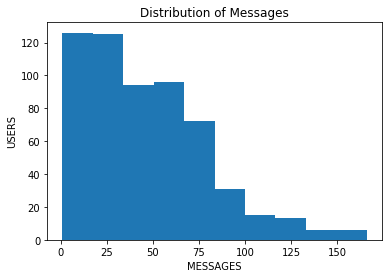

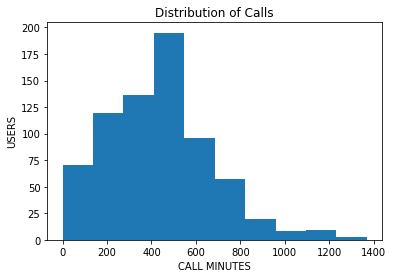

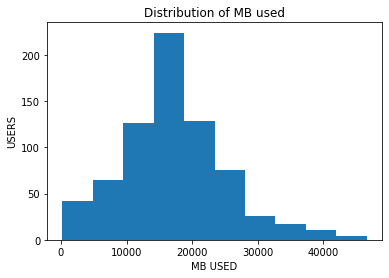

In [44]:
def analyzer(data):
  print("*******************************")
  print("******* 🅰🅽🅰🅻🆈🆉🅴🆁 ********")
  print("*******************************")

  print(" ")
  print ("    🅼🅴🆂🆂🅰🅶🅴🆂")
  print(" ")
  print("variance", "", int(np.var(data.mess_stats)))
  print("MONTHLY")
  print(data.mess_stats.describe())
  print("************************ ")
  print(" ")
  print ("     🅲🅰🅻🅻🆂")
  print(" ")
  print("MONTHLY")
  print("variance", "", np.var(data.calls_sum))
  print(data.calls_sum.describe())
  print("************************ ")
  print(" ")

  print ("   🅼🅴🅶🅰🅱🆈🆃🅴")
  print(" ")
  print("MONTHLY")
  print("variance", "", int(np.var(data.mb_used)))
  print(data.mb_used.describe())
  print("************************ ")
  print(" ") 
  print ("                              🅿🅻🅾🆃🆂 OF MONTHLY AVERAGES")
  print(" ") 
  print ("HISTS OD USERS DISTRIBUTIONS")

  plt.hist(data.mess_stats)
  plt.title("Distribution of Messages")
  plt.ylabel("USERS")
  plt.xlabel("MESSAGES")
  plt.show()

  plt.hist(data.calls_sum)
  plt.title("Distribution of Calls")
  plt.ylabel("USERS")
  plt.xlabel("CALL MINUTES")
  plt.show()

  plt.hist(data.mb_used)
  plt.title("Distribution of MB used")
  plt.ylabel("USERS")
  plt.xlabel("MB USED")
  plt.show()



analyzer(ultimate)



The histograms demonstrate the distribution of the users on a "light" to "heavy" scale. The messages column demonstrates a clear negative distribution. Meaning that only small number of customers tend to use the messages prequently. Most users stay bellow 50 monthly messages. 

The CALLS histogram demonstrates a more normally distributed dataset, yet the vast majority of the customers are below the 600 monthly minutes mark. 

The same is true for the MB used histogram, that displays the typical slightly negative normal distribution.

Let's perform the same procedure with the surf plan:

*******************************
******* 🅰🅽🅰🅻🆈🆉🅴🆁 ********
*******************************
 
    🅼🅴🆂🆂🅰🅶🅴🆂
 
variance  1090
MONTHLY
count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: mess_stats, dtype: float64
************************ 
 
     🅲🅰🅻🅻🆂
 
MONTHLY
variance  52537.03666530514
count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: calls_sum, dtype: float64
************************ 
 
   🅼🅴🅶🅰🅱🆈🆃🅴
 
MONTHLY
variance  62128323
count     1558.000000
mean     16717.702137
std       7884.682983
min         92.310000
25%      12187.955000
50%      16923.830000
75%      21039.860000
max      70931.590000
Name: mb_used, dtype: float64
************************ 
 
                              🅿🅻🅾🆃🆂 OF MONTHLY AVERAGES
 
HISTS OD USERS DISTRIBUTIONS


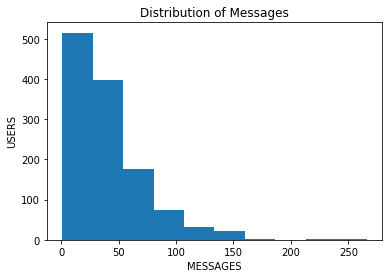

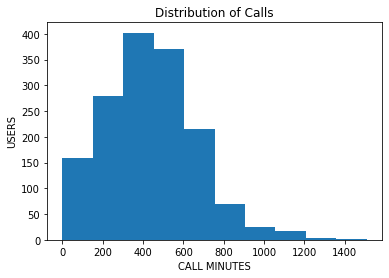

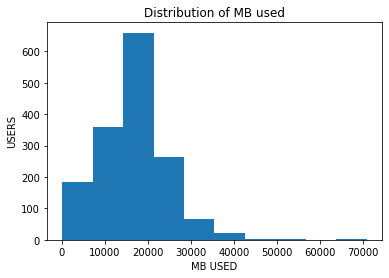

In [45]:
analyzer(surf)

In [46]:
print("The max 3 values of ULTIMATE calls are: \n",  ultimate.calls_sum.nlargest(3))
print("while max 3 values of SURF calls are: \n",  surf.calls_sum.nlargest(3))
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("The max 3 values of ULTIMATE messages are: \n",  ultimate.mess_stats.nlargest(3))
print("while max 3 values of SURF messages are: \n",  surf.mess_stats.nlargest(3))
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("****************************************************")
print("The max 3 values of ULTIMATE mb are: \n",  ultimate.mb_used.nlargest(3))
print("while max 3 values of SURF mb are: \n",  surf.mb_used.nlargest(3))


The max 3 values of ULTIMATE calls are: 
 438    1369.0
502    1295.0
498    1292.0
Name: calls_sum, dtype: float64
while max 3 values of SURF calls are: 
 1571    1510.0
1923    1357.0
1752    1304.0
Name: calls_sum, dtype: float64
****************************************************
****************************************************
****************************************************
****************************************************
****************************************************
The max 3 values of ULTIMATE messages are: 
 195    166.0
193    155.0
194    153.0
Name: mess_stats, dtype: float64
while max 3 values of SURF messages are: 
 853     266.0
1960    224.0
1961    180.0
Name: mess_stats, dtype: float64
****************************************************
****************************************************
****************************************************
****************************************************
****************************************************
Th

Amazing... Some people obviously rather get a low cost bundle but pay the extra! Brits have a saying: *we are not rich enough to buy cheap.*

Let's normalize the data and take a look at the distribution of the two bundles:

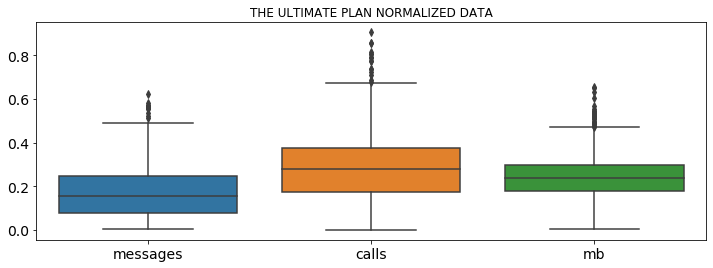

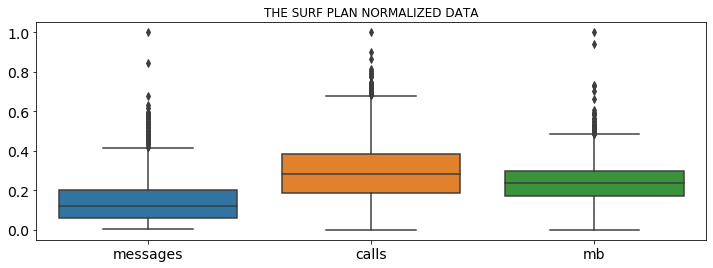

In [47]:
############# ULTIMATE PLAN ######################
 
# Let's create a new df with the data we need:

tab = pd.DataFrame()

tab["messages"] = multi_group["mess_stats"]
tab["calls"] = multi_group["calls_sum"]
tab["mb"] = multi_group["mb_used"]
tab["plan"] = multi_group["plan"]
tab["month"] =  multi_group["month"]

# Normalization

normed_df = pd.DataFrame()
list_of_columns = ["messages", "calls", "mb"]

for col in list_of_columns:
  normed_df[col] = tab[col] / max(tab[col])
  normed_df["plan"] = tab["plan"]

# Plotting 

fig,ax = plt.subplots(1,figsize=(12,4))
ax = sns.boxplot(data=normed_df[normed_df.plan == "ultimate"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, )
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_title("THE ULTIMATE PLAN NORMALIZED DATA")
plt.show()

# ##################################################################
# ##################################################################
# ##################################################################
# #################### SURF PLAN ###################################

print(" ")
fig,ax = plt.subplots(1,figsize=(12,4))
ax = sns.boxplot(data=normed_df[normed_df.plan == "surf"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, )
ax.tick_params(which = 'major', labelsize = 14,)
ax.set_title("THE SURF PLAN NORMALIZED DATA")
plt.show()




Now we can clearly see the behavioral differences of the customers in both plans. We see again the tendecy we noted previuosly - some of the customers of the cheaper surf plan tend to consume more services than the heavy users from the ultimate plan.  


Let's also do this:

In [48]:
print(" COMPARING THE CUSTOMERS BEHAVIOR IN BOTH GROUPS  ")
print(" ")
tab[tab.plan == "ultimate"].describe() - tab[tab.plan == "surf"].describe()


 COMPARING THE CUSTOMERS BEHAVIOR IN BOTH GROUPS  
 


,messages,calls,mb,month
count,-638.000000,-832.000000,-839.000000,-853.000000
mean,6.186577,-1.843724,520.940116,-0.031065
std,-0.093382,8.568318,-53.664660,0.090295
min,0.000000,0.000000,140.860000,0.000000
25%,5.000000,-16.000000,483.175000,0.000000
50%,9.000000,-5.000000,-60.380000,0.000000
75%,12.000000,-13.000000,-14.705000,0.000000
max,-100.000000,-141.000000,-24336.260000,0.000000


By deducting the describe methods on the columns of two plans we got some interesting findings:

As stated many times already - the maxes of ultimate users are lower (last row in the column) than the maxes of the heavy users in the surf plan.
 
The ultimate plan users on mean send only 6 messages more than the surf users ( 9 messages on the medean).

The ultimate plan users spend slightly less time on their phones (-1 to -5 minutes less), and more on the web (more mb_used, on the mean)


# "How many minutes and SMS and the volume of web traffic do the users of each of the plans require per month?"

In [49]:
x = tab.groupby(["plan", "month"]).agg(["sum", "count"])

print("The ULTIMATE plan users require:")
print(int(tab.loc[(tab.plan == "ultimate"),["calls"]].sum()/12), "minutes per month")
print(int(tab.loc[(tab.plan == "ultimate"), ["messages"]].sum()/12), "messages per month")
print(int(tab.loc[(tab.plan == "ultimate"),["mb"]].sum()/12), "mb per month" )
print(" ")
print("The SURF plan users require:")
print(int(tab.loc[(tab.plan == "surf"),["calls"]].sum()/12), "minutes per month")
print(int(tab.loc[(tab.plan == "surf"), ["messages"]].sum()/12), "messages per month")
print(int(tab.loc[(tab.plan == "surf"),["mb"]].sum()/12), "mb per month" )
print(" ")
print("The ultimate plan users use:")
print(int(tab.loc[(tab.plan == "ultimate"),["calls"]].sum()/12) - int(tab.loc[(tab.plan == "surf"),["calls"]].sum()/12), "minutes than surf")
print(int(tab.loc[(tab.plan == "ultimate"), ["messages"]].sum()/12) - int(tab.loc[(tab.plan == "surf"), ["messages"]].sum()/12), "messages than surf")
print(int(tab.loc[(tab.plan == "ultimate"),["mb"]].sum()/12) - int(tab.loc[(tab.plan == "surf"),["mb"]].sum()/12), "mb than surf")

The ULTIMATE plan users require:
25827 minutes per month
2253 messages per month
1032881 mb per month
 
The SURF plan users require:
56201 minutes per month
4084 messages per month
2170514 mb per month
 
The ultimate plan users use:
-30374 minutes than surf
-1831 messages than surf
-1137633 mb than surf


### HYPOTHESES 1

Moving forward, let's check the hypothesis 1 that the average revenue from users of Ultimate and Surf calling plans differs. Our NULL hypotheses stats that they are the same.


1.   H*o* : avr revenue Ultimate plan == avr revenue Surf plan

2.   H*a* : avr revenue Ultimate plan != avr revenue Surf plan


Significance level: alpha = 0.03

n = 100 samples from each group

In [50]:
from scipy import stats as st
results = st.ttest_ind(
    ultimate[ultimate.m_rev.notna()]["m_rev"].sample(n = 100), 
     surf[surf.m_rev.notna()]["m_rev"].sample(n = 100),
    equal_var = True )

print('p-value: ', results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
  print("We reject Ho hypothesis. We found evidence for Ha.")
else:
  print("We reject Ha hypothesis. We found evidence for Ho.")

p-value:  0.05166793256470792
We reject Ha hypothesis. We found evidence for Ho.


In the code above we took 100 instances of m_rev (monthly revenue) of our ultimate/surf plans and compared the p_value to the alpha of 0.05 (5%). We are trying to answer the question is the average revenue from users of Ultimate and Surf calling plans differs. The code above should satisfy this question by using alpha as our threshold. 

With our code we rejected one of the hypotheses yet we **know** that the *ultimate plan* customers **pay more** by default. What if we deduct from their payments their plan payment, will the results still differ?

Let's check, this time by comparing the monthly payment NETTO averages:

In [51]:
a = ultimate.m_rev.sum() / len(ultimate.user_id) - 70
b = surf.m_rev.sum() / len(surf.user_id) - 20

In [52]:
print("The ultimate plan subscriber, on avr, pays", round(a - b), " USD on the services that are not included in the bundle") 

The ultimate plan subscriber, on avr, pays -38  USD on the services that are not included in the bundle


By the line of code above we manualy compared the avr revenues and see that the distance between the plans is too big, i.e. the chances that they are from the same "group" are very low, thus we reject the NULL hypotheses.

### HYPOTHESES 2

Our second hypotheses states that:

*The average revenue from users in NY-NJ area is different from that of the users from other regions.*

1.   H*o* : avr revenue NY-NJ customers == avr revenue OTHER area customers.

2.   H*a* :  avr revenue NY-NJ customers != avr revenue OTHER area customers.

Significance level: alpha = 0.03

n = 120 samples from each group

First let's split the data on  NY / not NY basis.

In [53]:
new_yorkers = multi_group[multi_group['PostCode'].str.contains("NY|NJ")]
normal_people = multi_group[~multi_group['PostCode'].str.contains("NY|NJ")]


Since we are here, let's compare the % of ultimate / surf plans customers in both groups. Is there any difference between the groups? 

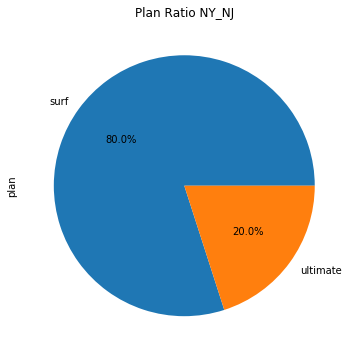

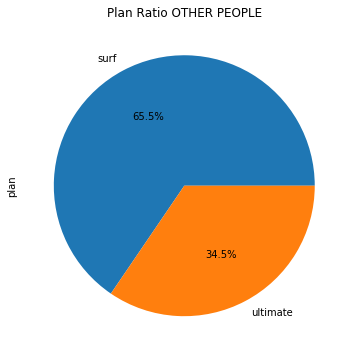

In [54]:

new_yorkers.plan.value_counts().plot.pie(y='type', figsize=(6, 6), autopct='%1.1f%%',title = "Plan Ratio NY_NJ")
plt.show()

normal_people.plan.value_counts().plot.pie(y='type', figsize=(6, 6), autopct='%1.1f%%',title = "Plan Ratio OTHER PEOPLE")
plt.show()

Seems like the people of the Big Apple tend to use surf plan more than their friends from the other areas. Has it anything to do with free wifii freely avalble in the big city?

The difference in the plan ratio across the population groups means that the group with more ultimate plans will pay more on avr. But we know that the total  payment is not the whole story, therefore we will also check the netto revenue, where no no plans are included.  

In [55]:
c = new_yorkers.m_rev.sum() / len(new_yorkers.user_id)
d = normal_people.m_rev.sum() / len(normal_people.user_id)

print("NY-NJ group, on avr, pays", round(c - d), " USD than the people from other cities.") 

NY-NJ group, on avr, pays -4  USD than the people from other cities.


Comparing the two datas, looks like the non-ny group OTHERS, on avr, pays more than the NY-NJ group. But not by much...
Will it pass our treshold?

Let's check our previous statement using the stats method ttest_ind:

1.   H*o* : avr revenue NY-NJ customers == avr revenue OTHER area customers.

2.   H*a* :  avr revenue NY-NJ customers != avr revenue OTHER area customers.

Significance level: alpha = 0.03

n = 120 samples from each group

In [56]:
from scipy import stats as st
results = st.ttest_ind(
    new_yorkers.m_rev.sample(n=120), 
    normal_people.m_rev.sample(n=120), equal_var = True)

print('p-value: ', results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
  print("We reject Ho hypothesis. We found evidence for Ha.")
else:
  print("We reject Ha hypothesis. We found evidence for Ho.")

p-value:  nan
We reject Ha hypothesis. We found evidence for Ho.


We see that p_value confirms our previous observation, therefore we SHALL NOT reject the Ho hypothesis. When comparing 120 samples from both groups, we see that the p_value is too high for us to reject the null hypothesis, as we indeed confirmed previously (last bar chart).

# Conclusion:

We recieved data files of telecom operator Megaline, that offers its clients two prepaid plans, Surf and Ultimate. Our main task was to determine which of the plans brings in more revenue in order to adjust the advertising budget.

We started by importing and fixing the datatypes when nessecary. 
We then calculated the number of calls made and minutes used per month, the number of text messages sent per month and the mb of data used per month.

We then continued with calculating the monthly revenue from each user. This sub-task requered merging multiple tables into one, subtracting the free package limit from the total number of calls, text messages, and mb, multiplying the result by the calling plan value and adding the monthly charge depending on the calling plan.

We then found the minutes, texts, and mbs the users of each plan require per month, calculated the mean, dispersion, and standard deviation of each plan and showed it on a graph. 

We then moved to testing 2 hypothesis:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

Knowing that Ultimate plan user pay 70 USD and surf users only 20 USD we defined the "avr revenue" in hypotheses 1 as a NETTO avr revenue, regular payment not included. By callculating and then plotting the graphs we demonstrated that the surf users have unsaturated demand for more services and they are readily pay more and more (the revenues are in uptrend). Our NULL hypothesis is that average revenue from users of Ultimate and Surf ARE EQUAL. We reject the NULL hypothesis. 

Moving to the city-based hypotheses 2 (The average revenue from users in NY-NJ area is different from that of the users from other regions), our NULL hypotheses was that the average revenue from users in NY-NJ area is equal to that of the users from other regions.

We have calculated the yearly avr revenue and yearly NETTO avr revenue and showed that although non-NY pays more when regualr payments are calculated, when we are comparing the NETTO payments - both groups generate ROUGHLY the same yearly avr revenue.
Therefore we did NOT reject the NULL hypothesis that both groups are equal.  

Finnaly, we confirmed this by scipy.stats.ttest_ind() method.

